# Candlestick Three Black Crows

https://www.investopedia.com/terms/t/three_black_crows.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'GME'
start = '2020-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6.14,6.47,6.07,6.31,6.31,4453600
2020-01-03,6.21,6.25,5.84,5.88,5.88,3543900
2020-01-06,5.80,5.91,5.60,5.85,5.85,3394800
2020-01-07,5.77,5.83,5.44,5.52,5.52,5228000
2020-01-08,5.49,5.85,5.41,5.72,5.72,5629400


## Candlestick with Three Black Crows

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,6.14,6.47,6.07,6.31,6.31,4453600,True
1,737427.0,6.21,6.25,5.84,5.88,5.88,3543900,False
2,737430.0,5.80,5.91,5.60,5.85,5.85,3394800,True
3,737431.0,5.77,5.83,5.44,5.52,5.52,5228000,False
4,737432.0,5.49,5.85,5.41,5.72,5.72,5629400,True


Text(0, 0.5, 'Price')

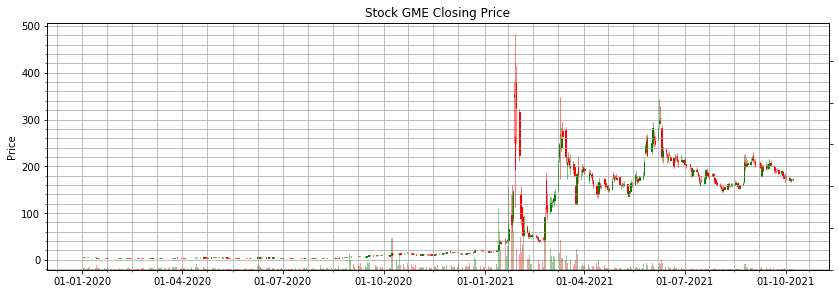

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
three_black_crows = talib.CDL3BLACKCROWS(df['Open'], df['High'], df['Low'], df['Close'])

three_black_crows = three_black_crows[three_black_crows != 0]

In [6]:
df['three_black_crows'] = talib.CDL3BLACKCROWS(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['three_black_crows'] !=0]

,Open,High,Low,Close,Adj Close,Volume,three_black_crows
Date,,,,,,,
2021-02-18,48.490002,48.869999,40.650002,40.689999,40.689999,23990600,-100


In [8]:
df['Adj Close'].loc[df['three_black_crows'] !=0]

Date
2021-02-18    40.689999
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['three_black_crows'] !=0].index

DatetimeIndex(['2021-02-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
three_black_crows

Date
2021-02-18   -100
dtype: int32

In [11]:
three_black_crows.index

DatetimeIndex(['2021-02-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,three_black_crows
Date,,,,,,,
2020-01-02,6.140000,6.470000,6.070000,6.310000,6.310000,4453600,0
2020-01-03,6.210000,6.250000,5.840000,5.880000,5.880000,3543900,0
2020-01-06,5.800000,5.910000,5.600000,5.850000,5.850000,3394800,0
2020-01-07,5.770000,5.830000,5.440000,5.520000,5.520000,5228000,0
2020-01-08,5.490000,5.850000,5.410000,5.720000,5.720000,5629400,0
...,...,...,...,...,...,...,...
2021-10-01,179.399994,179.490005,172.250000,176.910004,176.910004,1551100,0
2021-10-04,175.949997,176.949997,170.770004,171.360001,171.360001,1195700,0
2021-10-05,171.190002,173.169998,166.699997,172.179993,172.179993,1315900,0


Text(0, 0.5, 'Price')

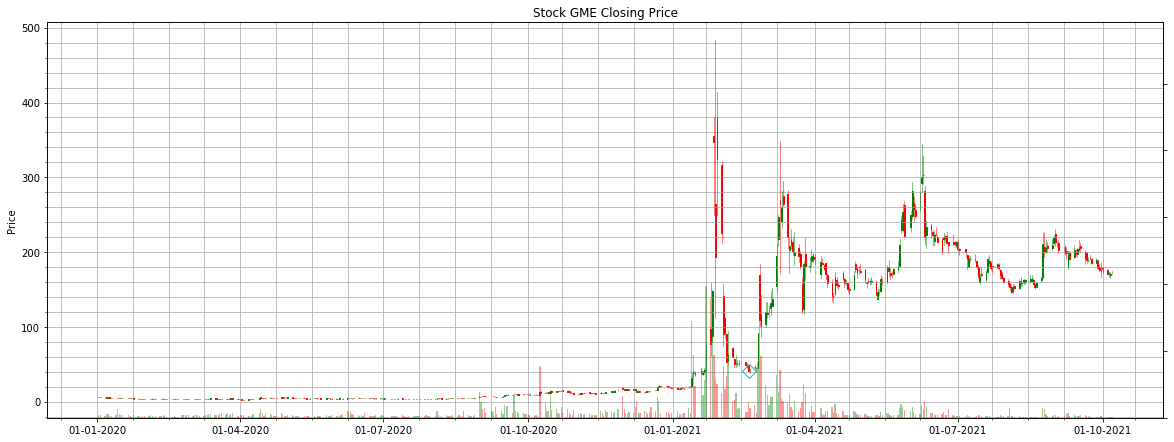

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_black_crows'] !=0].index, df['Adj Close'].loc[df['three_black_crows'] !=0],
                'Dc', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-02-01':'2021-04-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,three_black_crows,VolumePositive
0,737822.0,316.559998,322.000000,212.000000,225.000000,225.000000,37382200,0,False
1,737823.0,140.759995,158.000000,74.220001,90.000000,90.000000,78183100,0,False
2,737824.0,112.010002,113.400002,85.250000,92.410004,92.410004,42698500,0,False
3,737825.0,91.190002,91.500000,53.330002,53.500000,53.500000,62427300,0,False
4,737826.0,54.040001,95.000000,51.090000,63.770000,63.770000,81345000,0,True


Text(0, 0.5, 'Price')

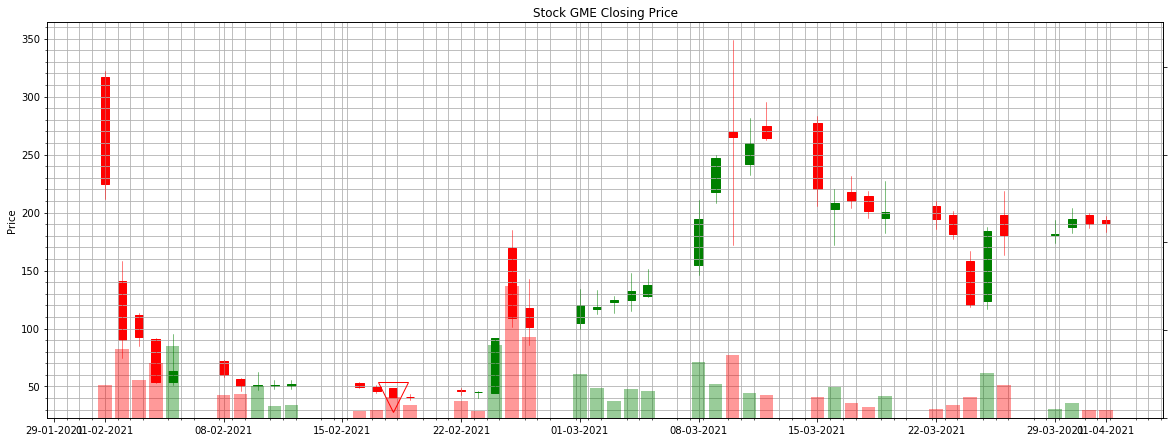

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['three_black_crows'] !=0].index, df['Adj Close'].loc[df['three_black_crows'] !=0],
                'vr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

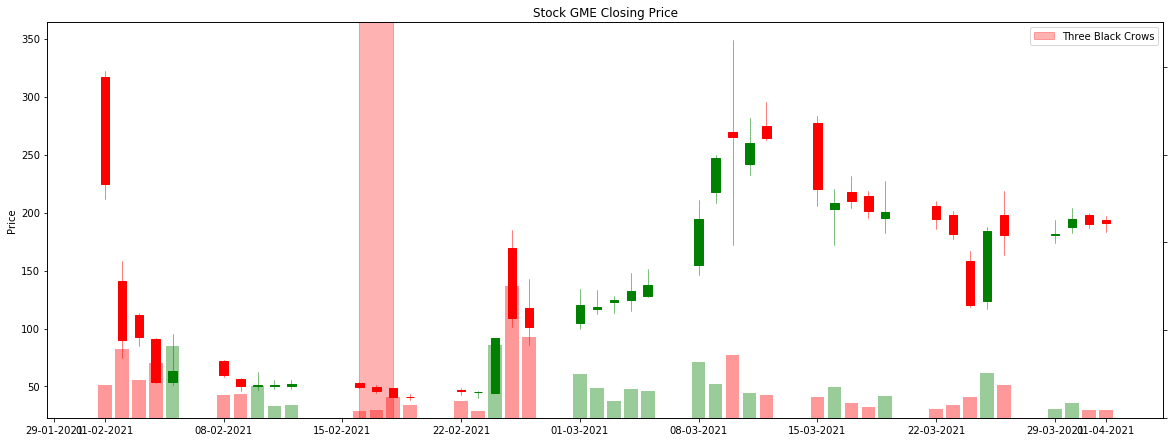

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,2,16)), date2num(datetime(2021,2,18)), 
           label="Three Black Crows",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')